# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:

No module named 'xraylib'




Transient Scan ID: 1     Time: 2023-05-26 14:10:20
Persistent Unique Scan ID: 'b08995c9-da01-432f-a388-21af09c35806'


New stream: 'primary'
+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_mean |
+-----------+------------+-------------------------+-------------+------------+
|         1 | 14:10:55.6 |                   0.000 |      34.315 |      0.000 |


|         2 | 14:11:24.3 |                   0.400 |      28.460 | 459483826166.747 |


|         3 | 14:11:53.9 |                   0.800 |      29.465 | 21705901626084.516 |


|         4 | 14:12:23.6 |                   1.200 |      29.502 | 70317918327588.344 |


|         5 | 14:12:53.3 |                   1.600 |      29.486 | 168418312414274.781 |


|         6 | 14:13:23.0 |                   2.000 |      29.483 | 346875726031568.125 |


+-----------+------------+-------------------------+-------------+------------+
generator scan ['b08995c9'] (scan num: 1)





                                 time  aperture_horizontalSize   
seq_num                                                          
1       2023-05-26 14:10:55.606895924                      0.0  \
2       2023-05-26 14:11:24.300105333                      0.4   
3       2023-05-26 14:11:53.964973927                      0.8   
4       2023-05-26 14:12:23.661571980                      1.2   
5       2023-05-26 14:12:53.348609686                      1.6   
6       2023-05-26 14:13:23.050240517                      2.0   

                                       w9_sirepo_data_json   
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...  \
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   
6        {"models": {"arbitraryMagFie

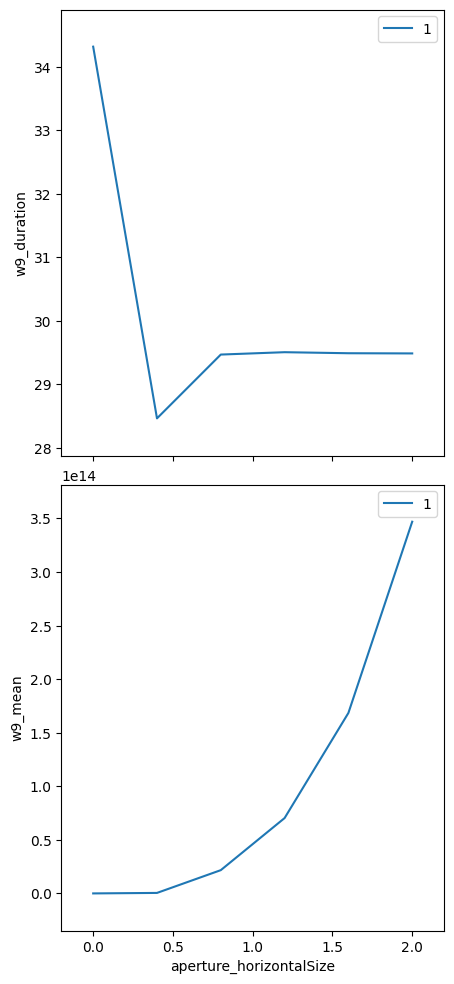

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 6))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (6, 42, 960)


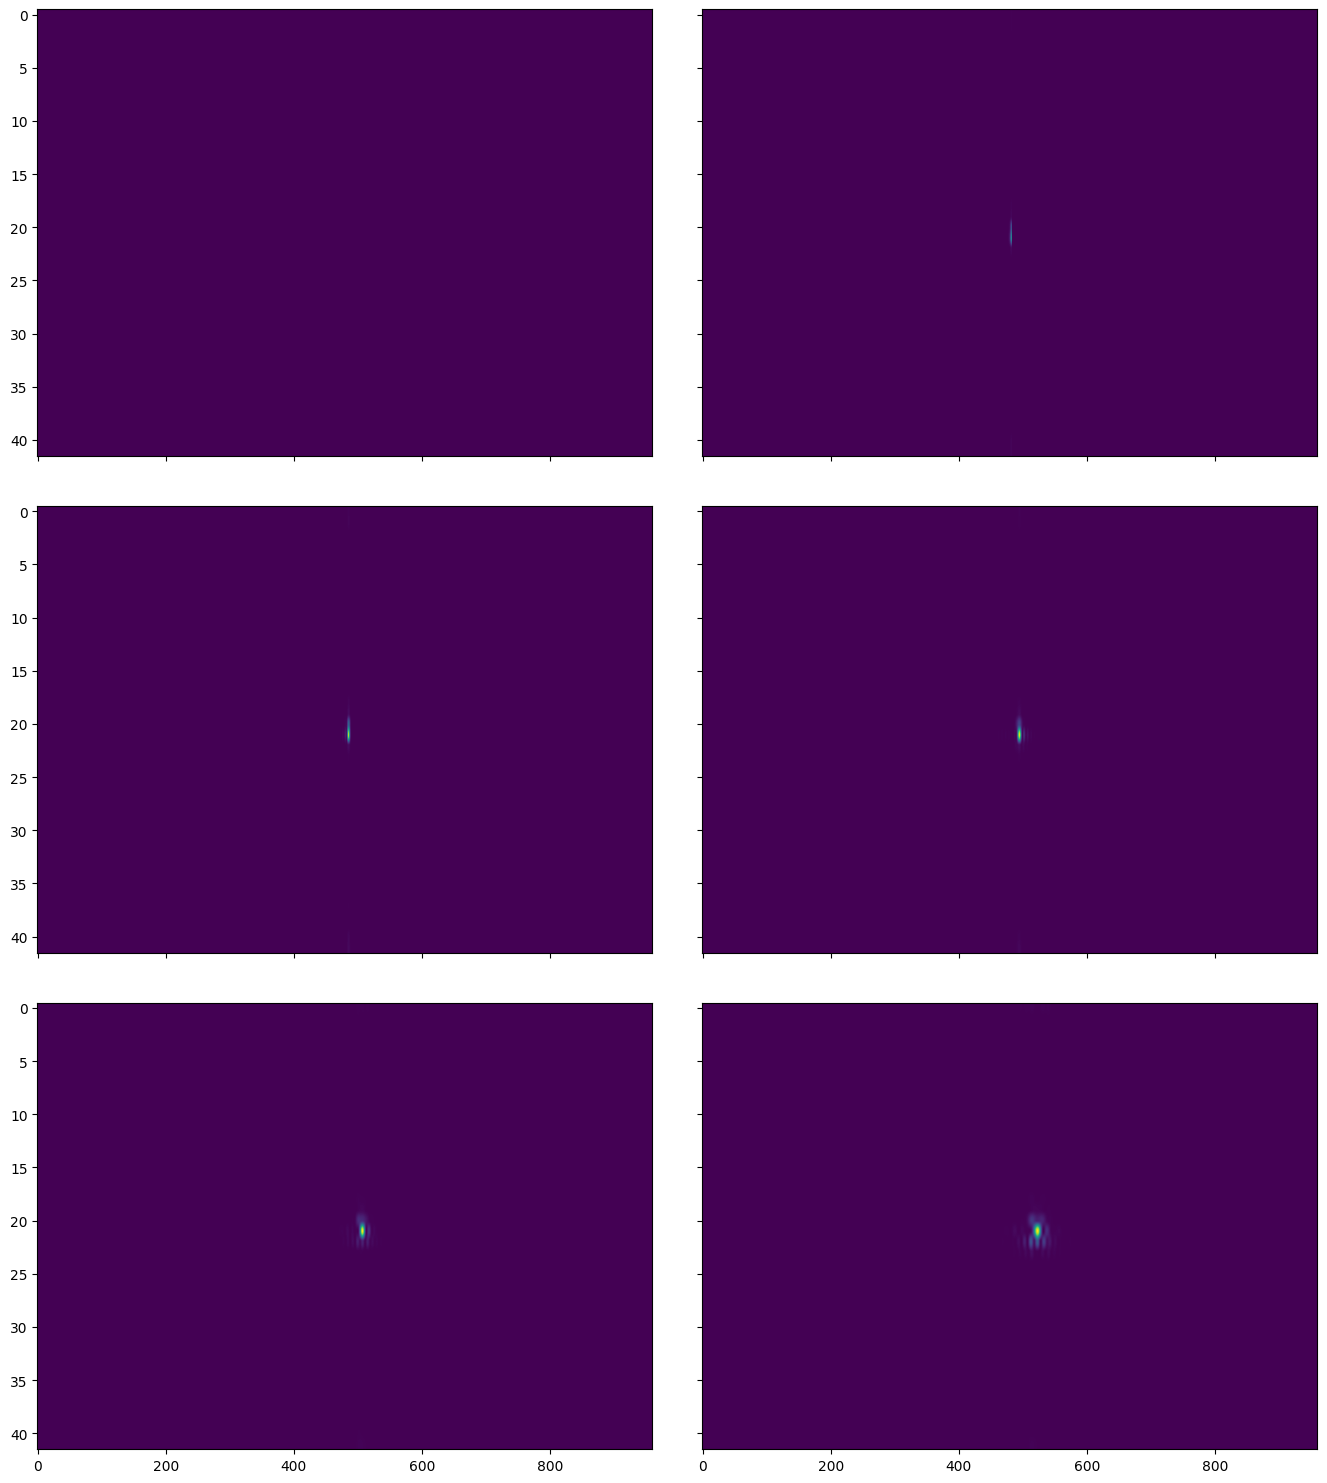

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beamline" Shadow3 simulations

This example repeats the above simulation, but instead uses Shadow3 to run the simulation. 

Number of points before change: 100000
Number of points after change: 1000000


Transient Scan ID: 1     Time: 2023-05-26 14:13:26
Persistent Unique Scan ID: 'cf0852d3-999b-487d-9d38-e2c1fe0ccf4b'


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array


New stream: 'primary'
+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_mean |
+-----------+------------+-------------------------+-------------+------------+
|         1 | 14:13:47.6 |                   0.000 |      19.303 |      0.000 |


|         2 | 14:14:07.9 |                   0.400 |      18.338 |      0.514 |


|         3 | 14:14:28.3 |                   0.800 |      18.331 |      1.025 |


|         4 | 14:14:47.7 |                   1.200 |      17.335 |      1.541 |


|         5 | 14:15:08.0 |                   1.600 |      18.328 |      2.062 |


|         6 | 14:15:28.3 |                   2.000 |      18.339 |      2.582 |


+-----------+------------+-------------------------+-------------+------------+
generator scan ['cf0852d3'] (scan num: 1)





getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array


                                 time   
seq_num                                 
1       2023-05-26 14:13:47.652730465  \
2       2023-05-26 14:14:07.940282345   
3       2023-05-26 14:14:28.312763929   
4       2023-05-26 14:14:47.705604792   
5       2023-05-26 14:15:08.019890547   
6       2023-05-26 14:15:28.321563244   

                                       w9_sirepo_data_json   
seq_num                                                      
1        {"models": {"beamStatisticsReport": {"driftDiv...  \
2        {"models": {"beamStatisticsReport": {"driftDiv...   
3        {"models": {"beamStatisticsReport": {"driftDiv...   
4        {"models": {"beamStatisticsReport": {"driftDiv...   
5        {"models": {"beamStatisticsReport": {"driftDiv...   
6        {"models": {"beamStatisticsReport": {"driftDiv...   

                                       w9_sirepo_data_hash  w9_duration   
seq_num                                                                   
1        7e863ae70d21008

getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array


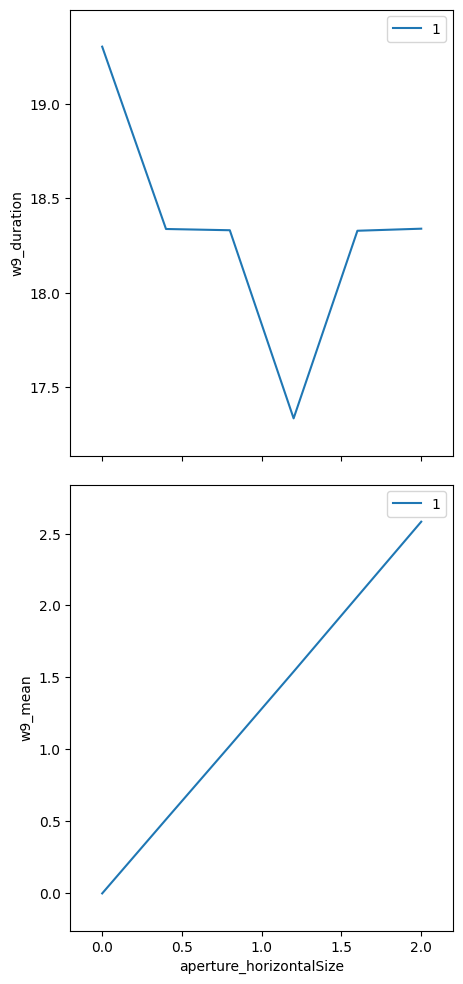

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

print(f"Number of points before change: {data['models']['simulation']['npoint']}")
data['models']['simulation']['npoint'] = 1000000
print(f"Number of points after change: {data['models']['simulation']['npoint']}")
aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 6))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (6, 100, 100)


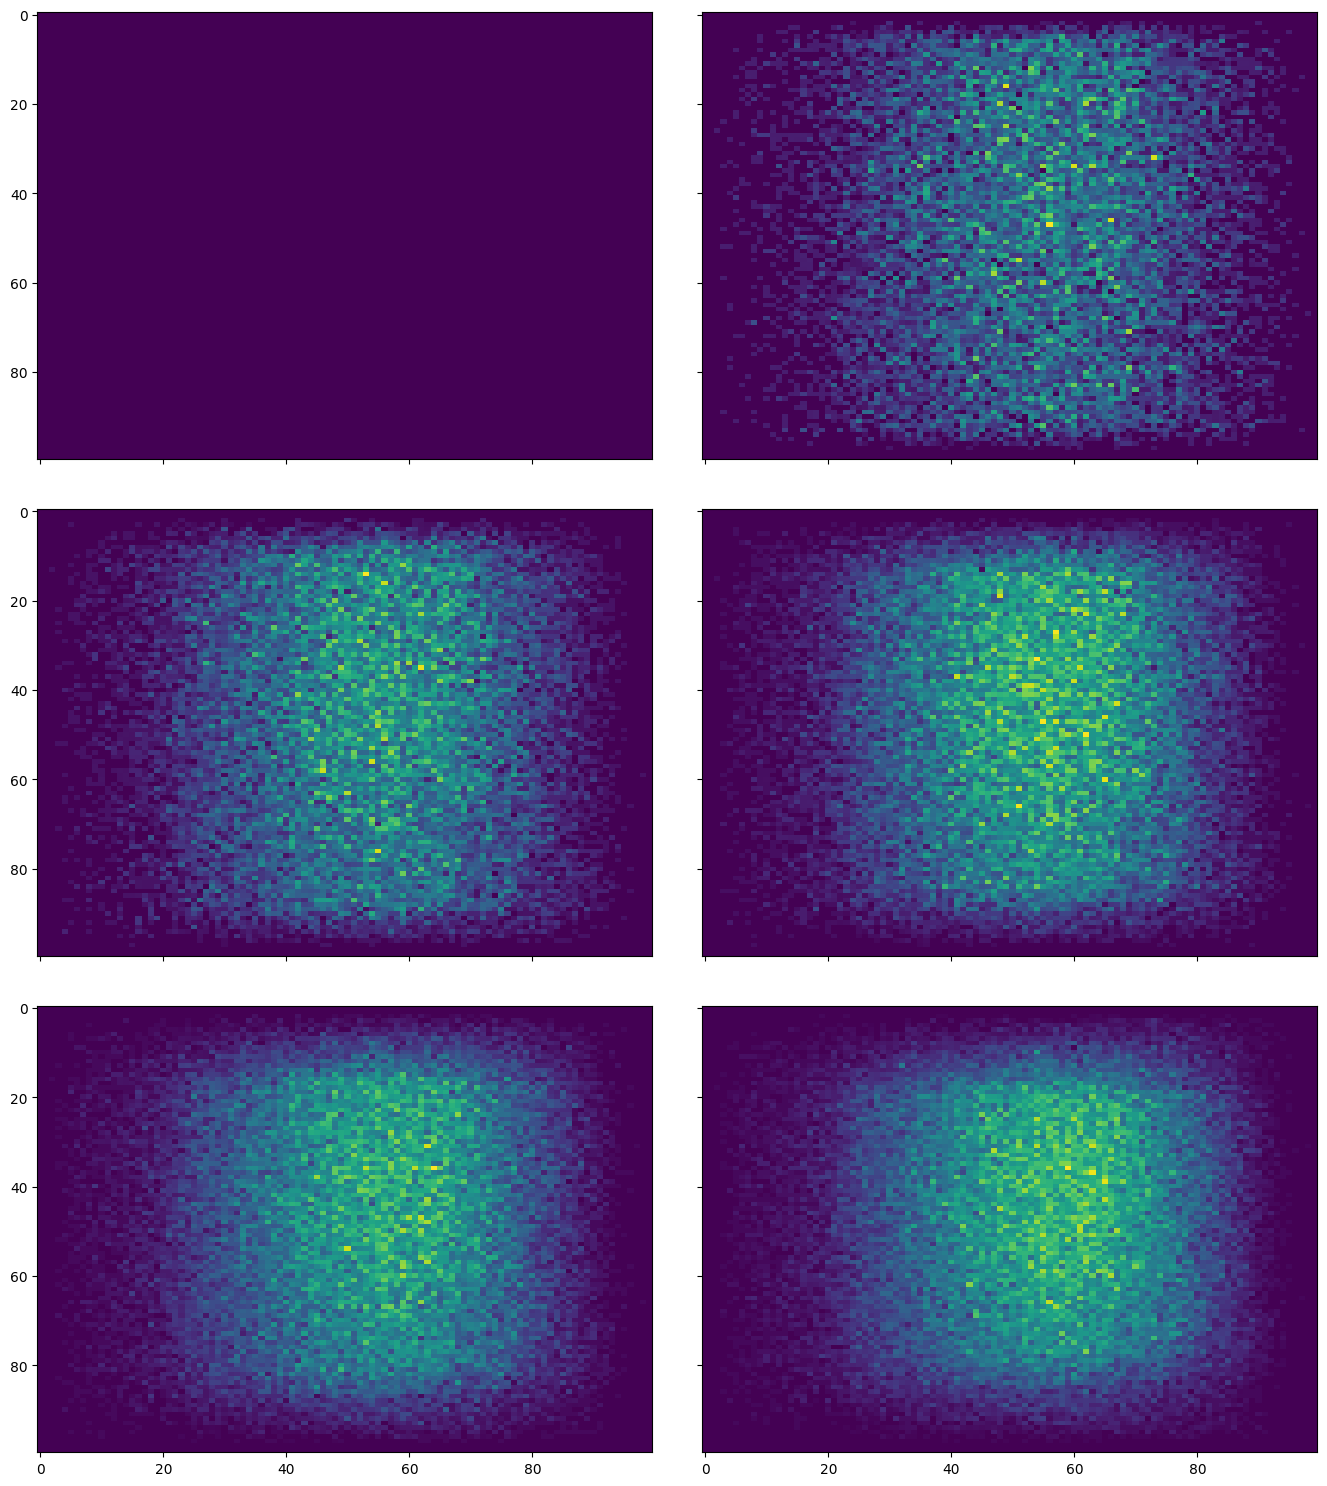

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.



Transient Scan ID: 1     Time: 2023-05-26 14:15:40
Persistent Unique Scan ID: '8033c076-ad31-426d-bed9-af210cbfd8ca'


New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | toroid_r_maj | bsr_duration |
+-----------+------------+--------------+--------------+
|         1 | 14:15:43.7 |    10000.000 |        3.081 |


|         2 | 14:15:46.9 |    12000.000 |        3.091 |


|         3 | 14:15:50.1 |    14000.000 |        3.079 |


|         4 | 14:15:53.2 |    16000.000 |        3.078 |


|         5 | 14:15:56.4 |    18000.000 |        3.098 |


|         6 | 14:15:59.6 |    20000.000 |        3.083 |


|         7 | 14:16:03.7 |    22000.000 |        4.097 |


|         8 | 14:16:06.9 |    24000.000 |        3.073 |


|         9 | 14:16:10.1 |    26000.000 |        3.091 |


|        10 | 14:16:13.2 |    28000.000 |        3.074 |


|        11 | 14:16:16.4 |    30000.000 |        3.080 |


|        12 | 14:16:19.5 |    32000.000 |        3.090 |


|        13 | 14:16:22.7 |    34000.000 |        3.080 |


|        14 | 14:16:25.9 |    36000.000 |        3.078 |


|        15 | 14:16:29.0 |    38000.000 |        3.084 |


|        16 | 14:16:32.2 |    40000.000 |        3.076 |


|        17 | 14:16:35.3 |    42000.000 |        3.074 |


|        18 | 14:16:38.5 |    44000.000 |        3.085 |


|        19 | 14:16:41.7 |    46000.000 |        3.078 |


|        20 | 14:16:44.8 |    48000.000 |        3.089 |


|        21 | 14:16:48.0 |    50000.000 |        3.077 |
+-----------+------------+--------------+--------------+
generator scan ['8033c076'] (scan num: 1)





                                 time   
seq_num                                 
1       2023-05-26 14:15:43.766732693  \
2       2023-05-26 14:15:46.940278053   
3       2023-05-26 14:15:50.100308180   
4       2023-05-26 14:15:53.261148453   
5       2023-05-26 14:15:56.445344210   
6       2023-05-26 14:15:59.604776382   
7       2023-05-26 14:16:03.779748917   
8       2023-05-26 14:16:06.935386896   
9       2023-05-26 14:16:10.106387615   
10      2023-05-26 14:16:13.261947155   
11      2023-05-26 14:16:16.417891741   
12      2023-05-26 14:16:19.586018085   
13      2023-05-26 14:16:22.746382236   
14      2023-05-26 14:16:25.907964706   
15      2023-05-26 14:16:29.077612638   
16      2023-05-26 14:16:32.233008623   
17      2023-05-26 14:16:35.385603428   
18      2023-05-26 14:16:38.549337387   
19      2023-05-26 14:16:41.703598261   
20      2023-05-26 14:16:44.871011257   
21      2023-05-26 14:16:48.027321815   

                                      bsr_sirepo_data_js

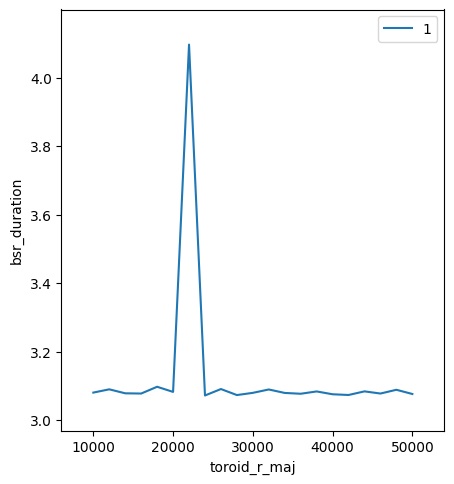

In [5]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"
bsr.duration.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

/tmp/ipykernel_5327/2351232241.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 4))


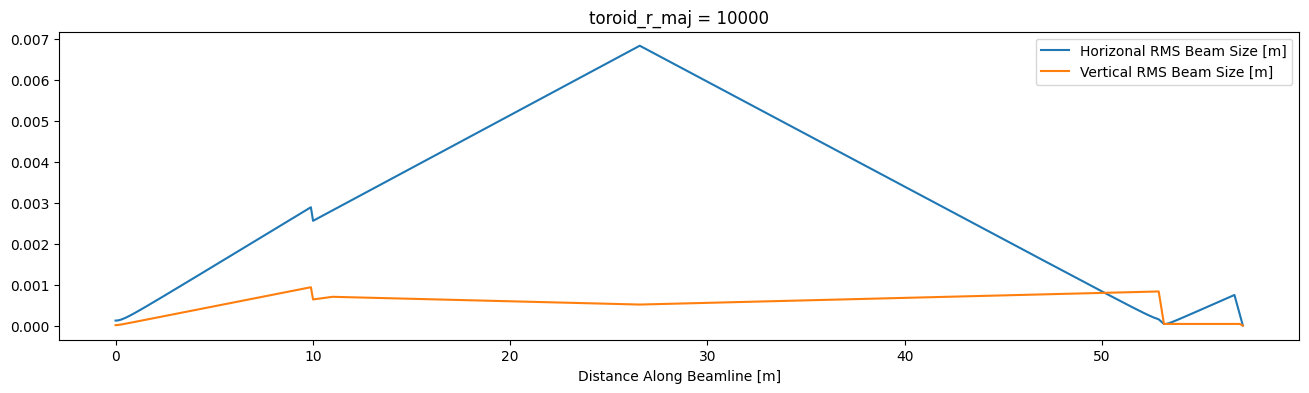

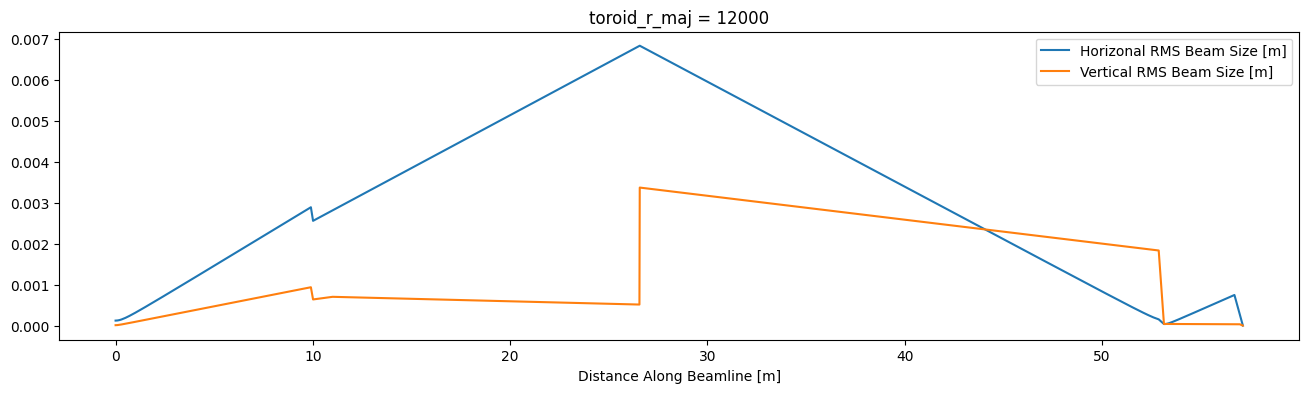

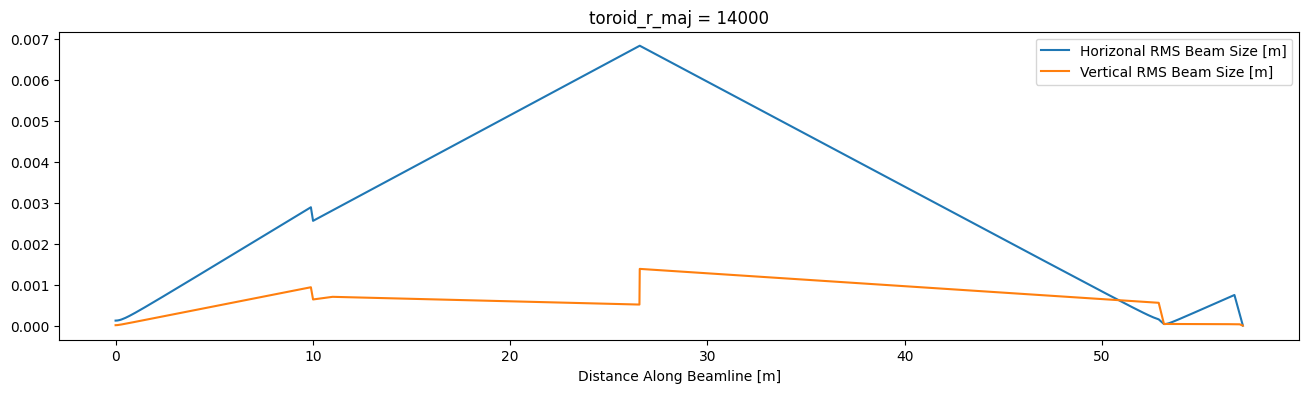

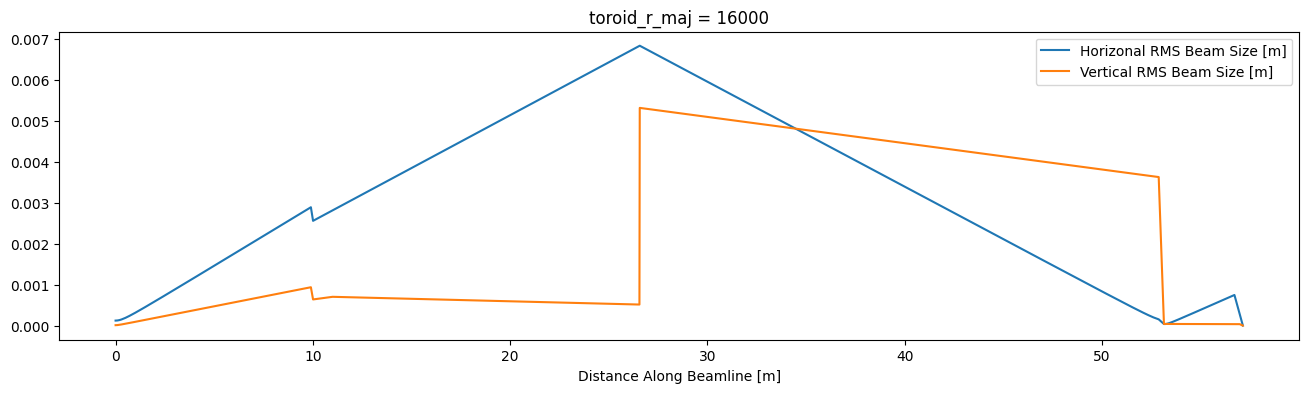

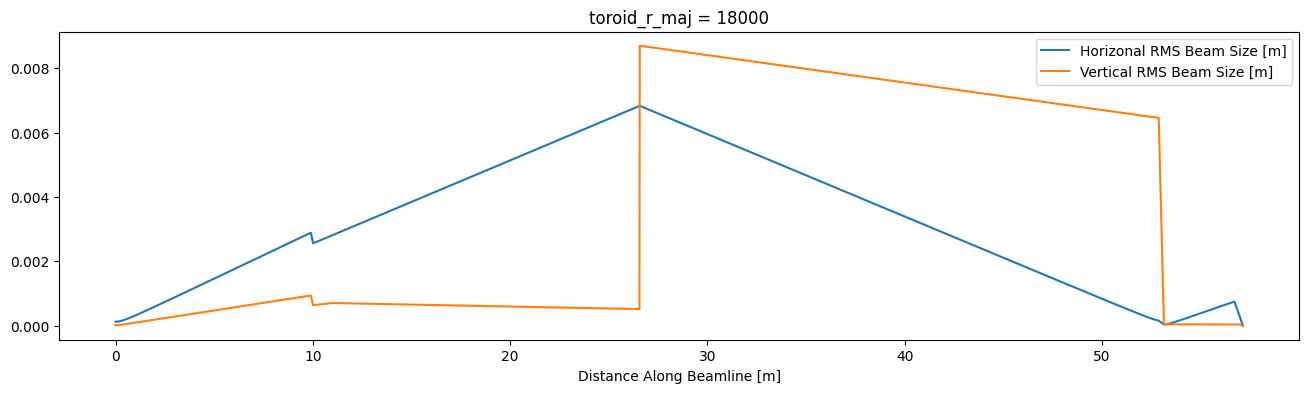

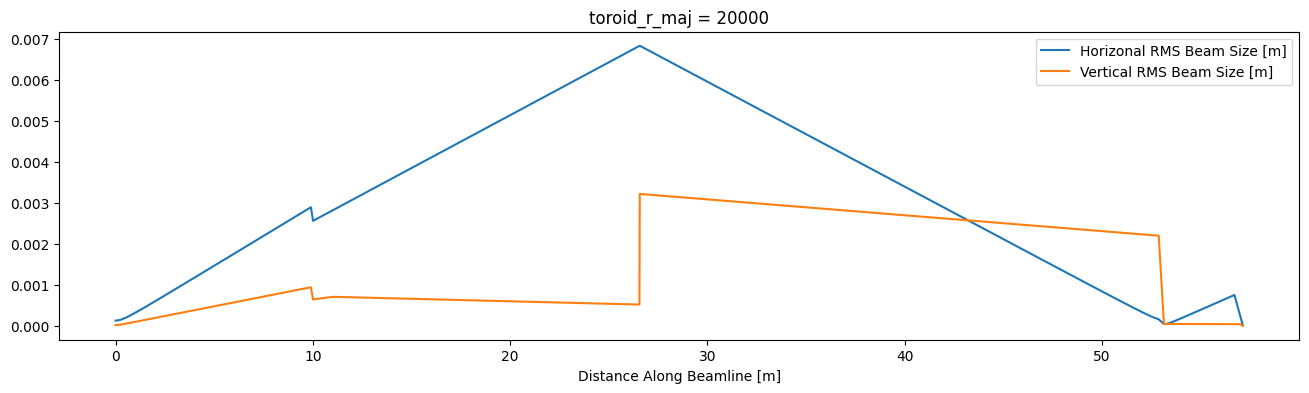

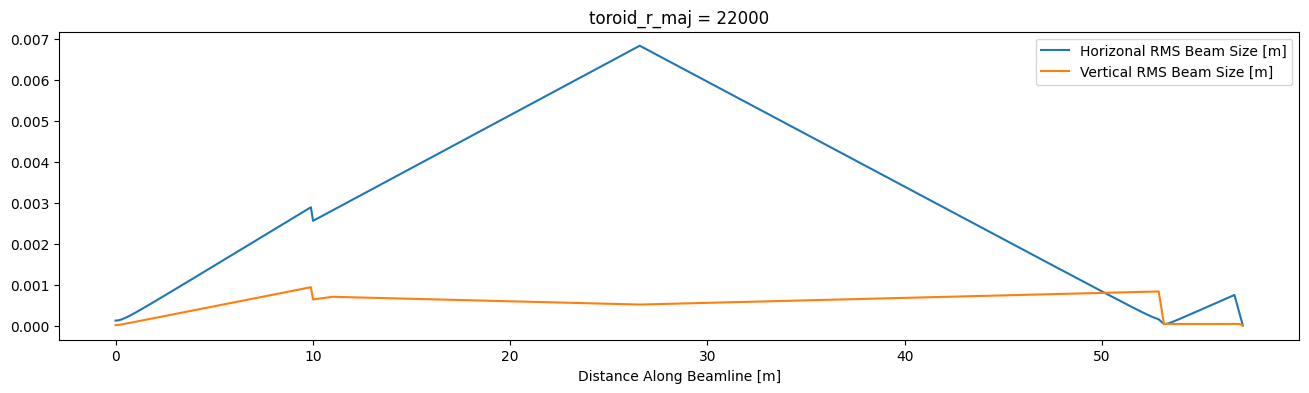

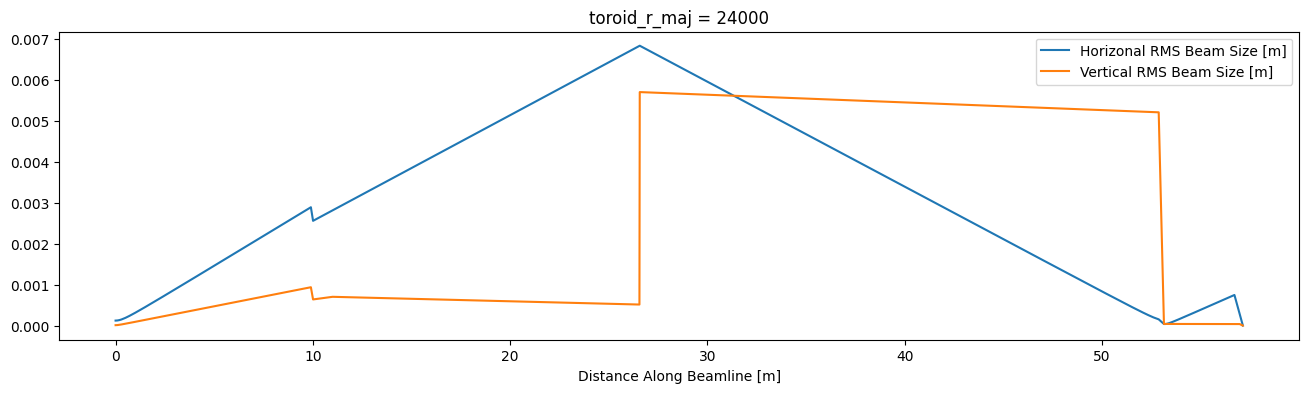

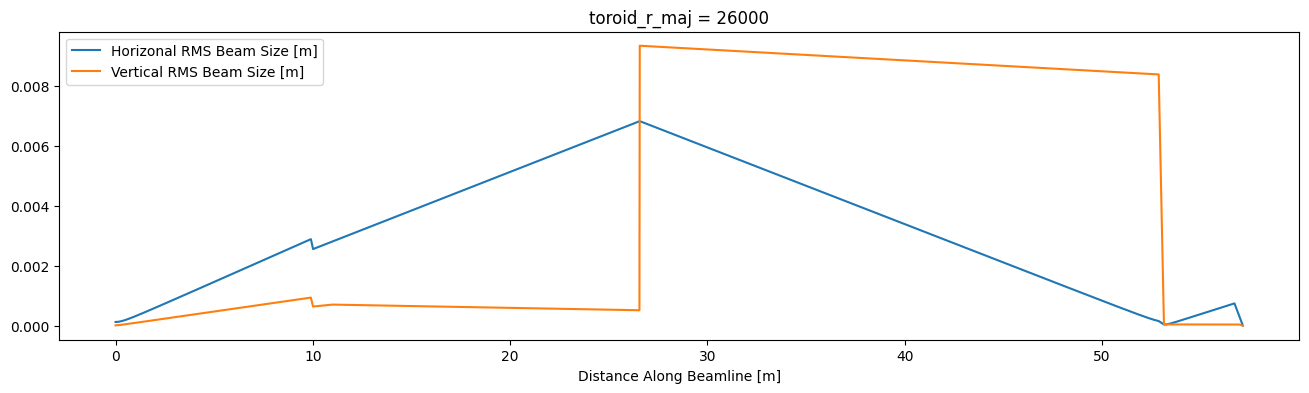

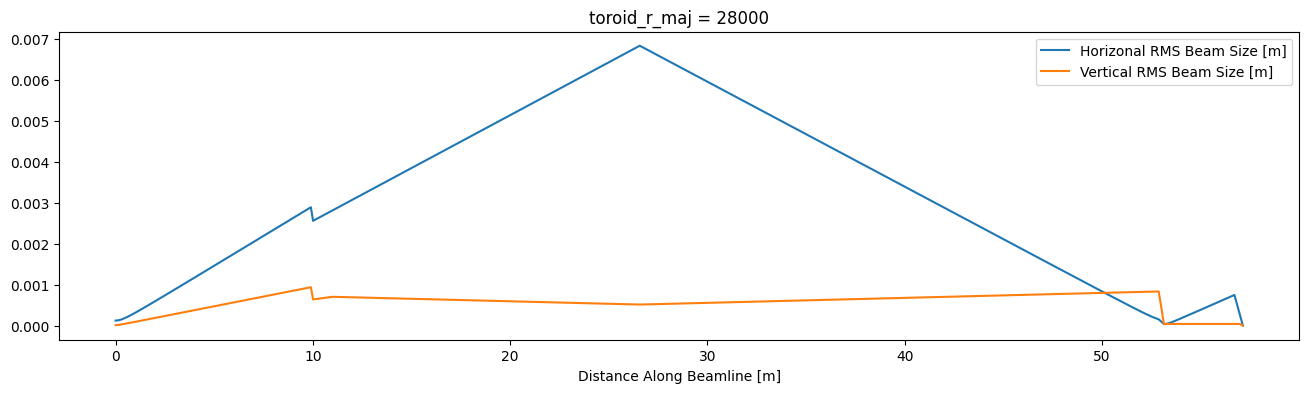

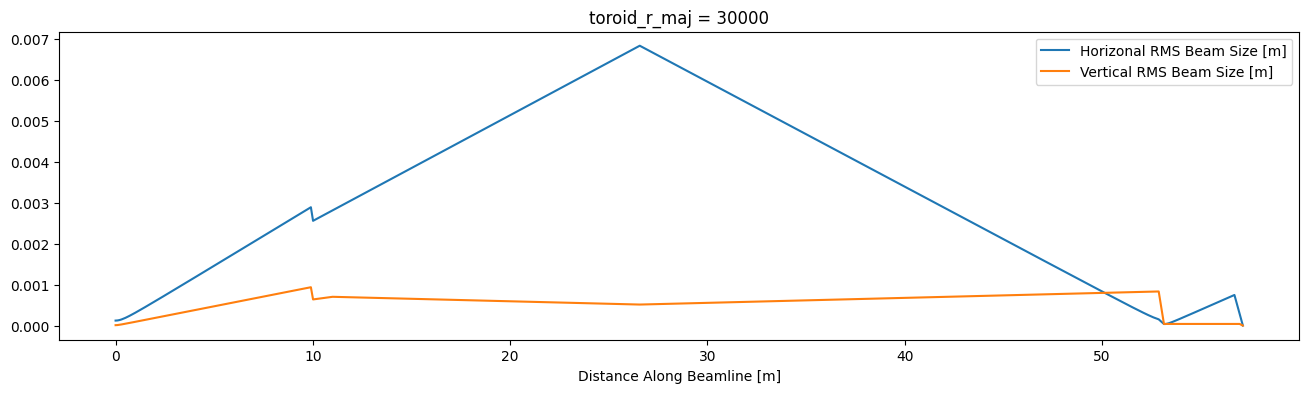

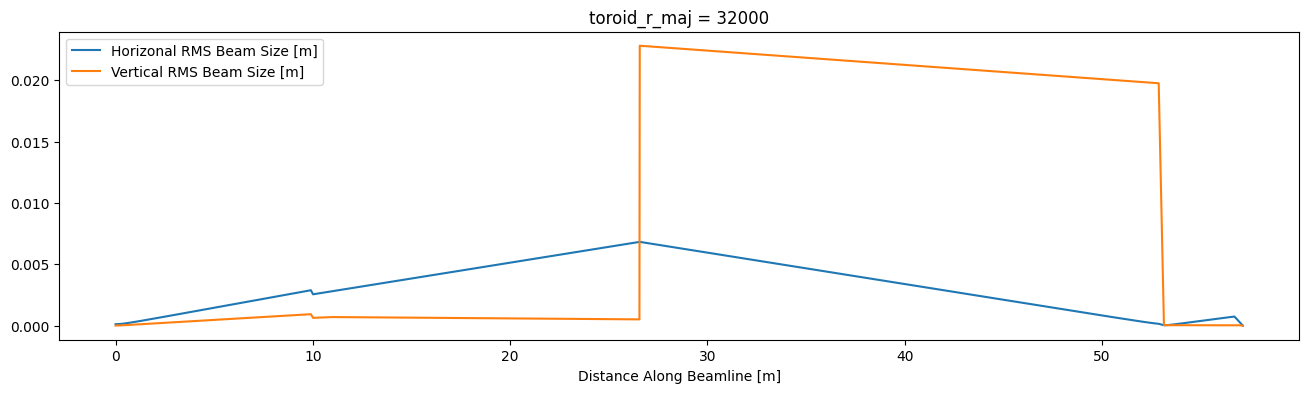

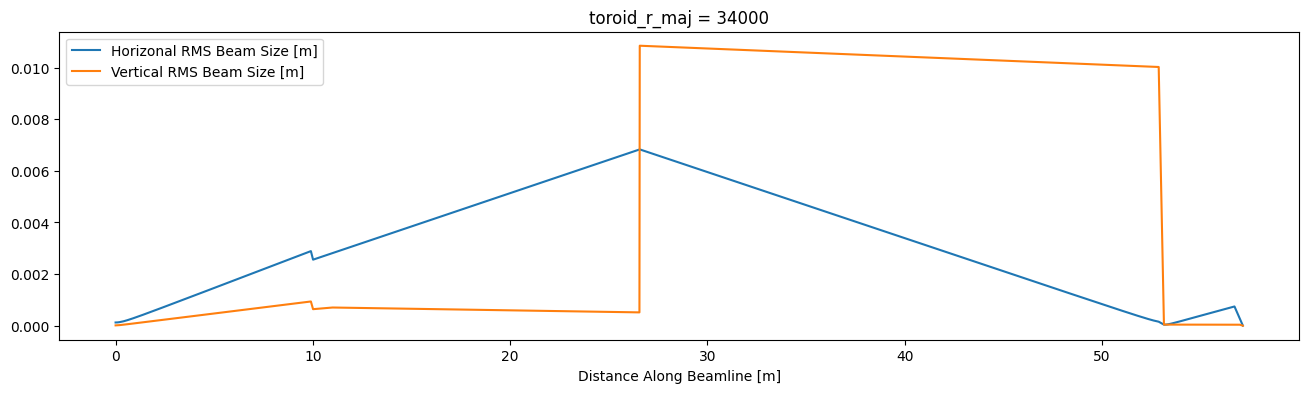

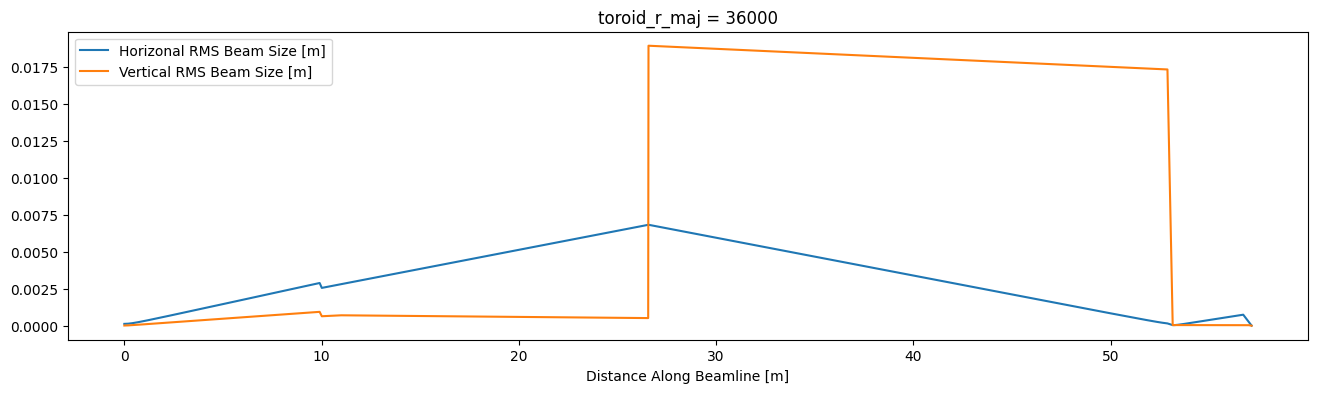

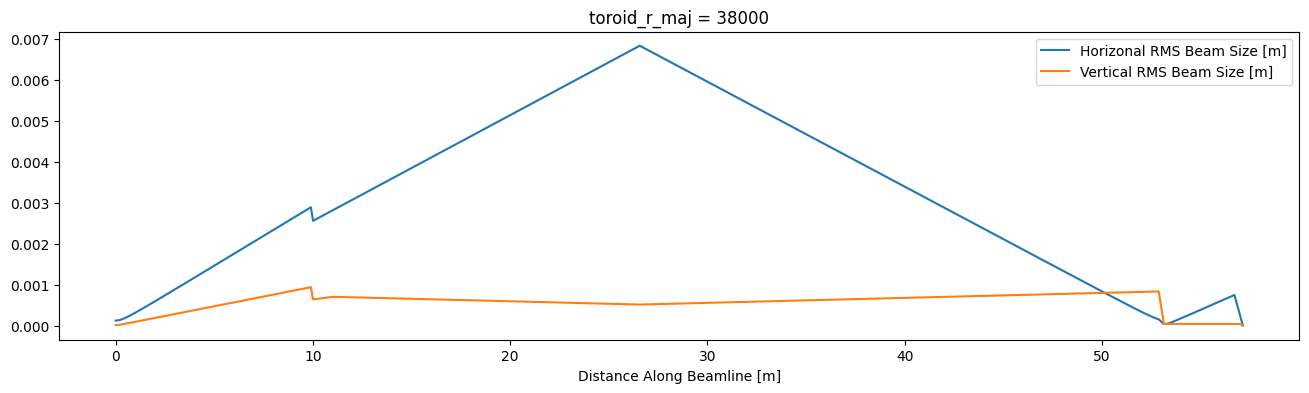

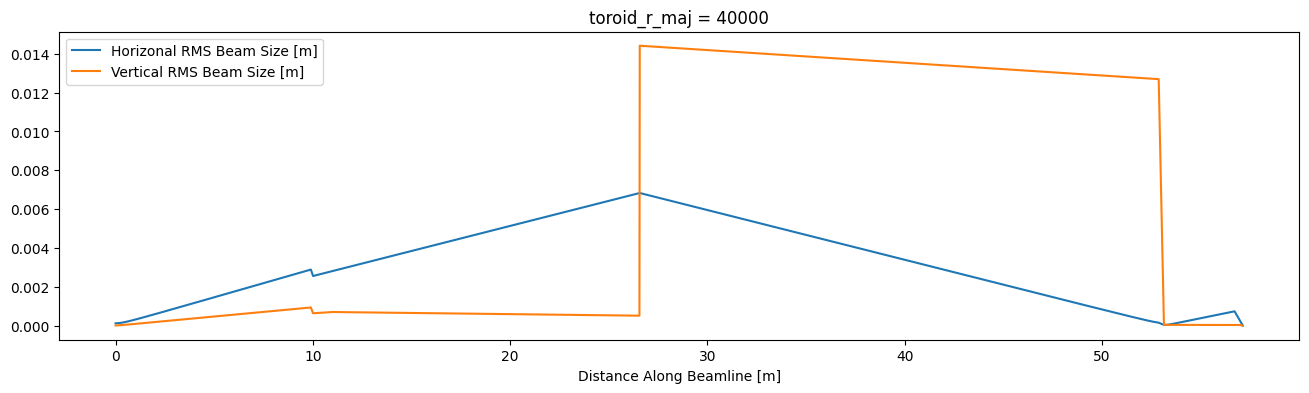

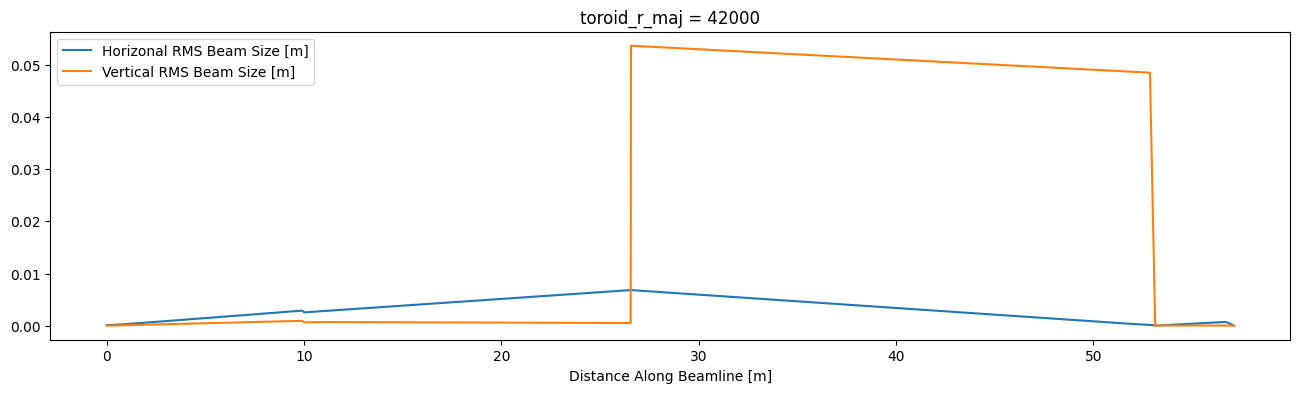

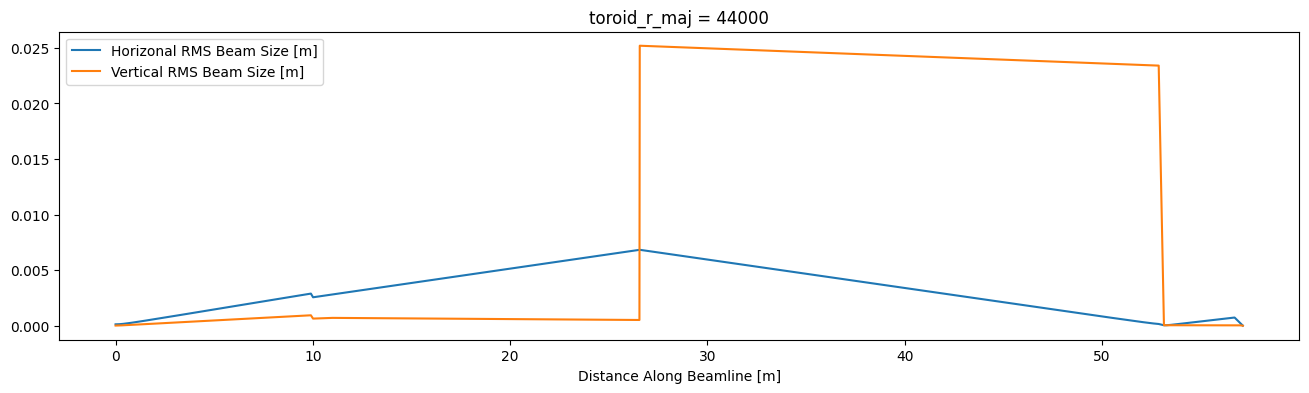

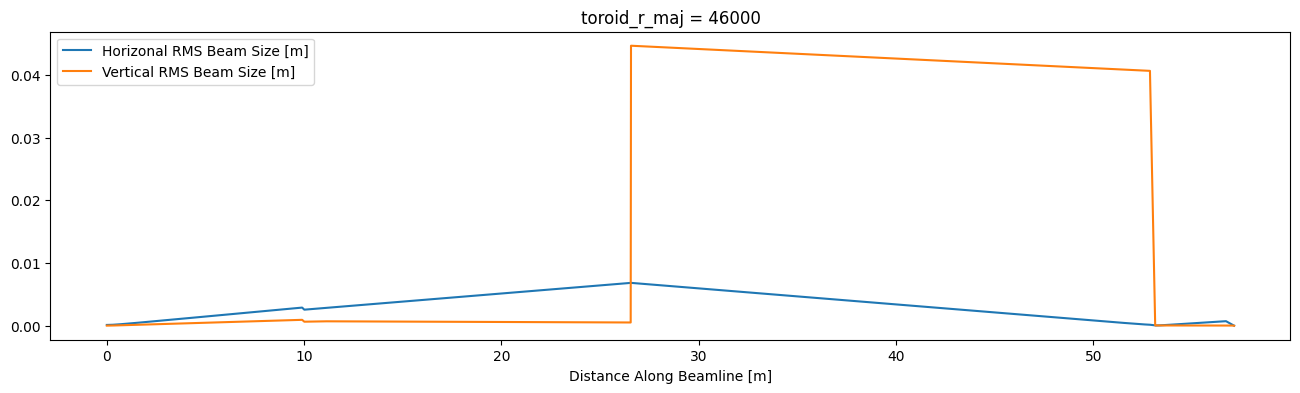

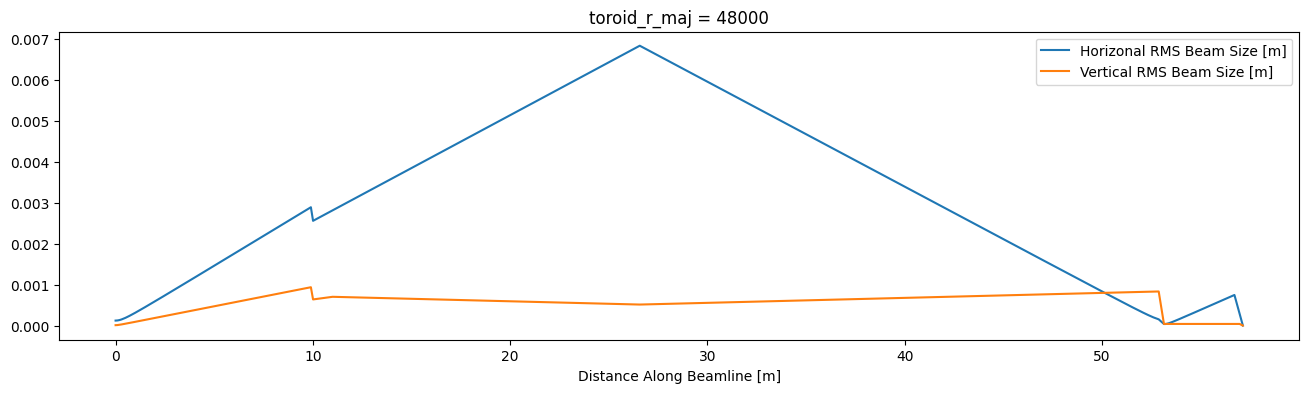

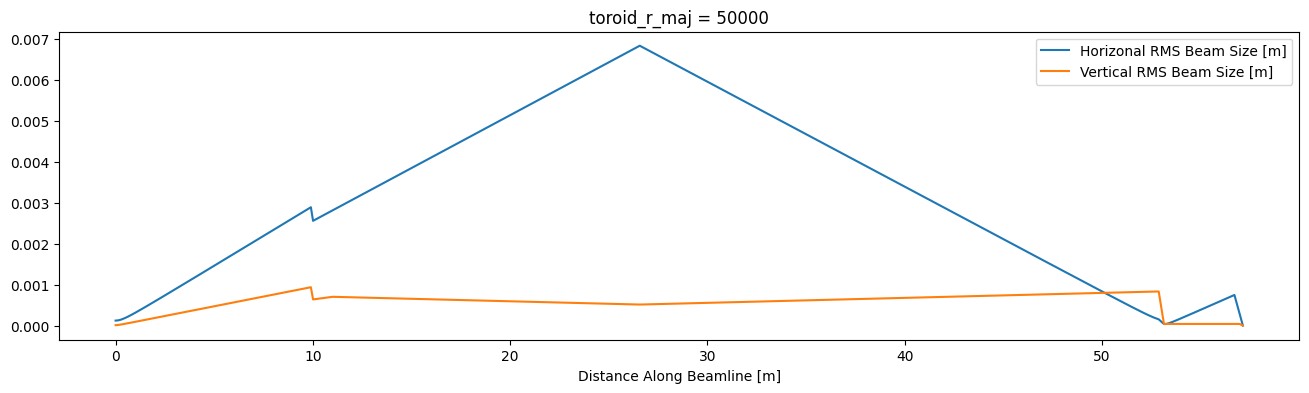

In [6]:
import json
import matplotlib.pyplot as plt

for idx in range(1, tbl["toroid_r_maj"].size + 1):
    d = json.loads(tbl["bsr_report"][idx])
    plt.figure(figsize=(16, 4))
    plt.plot(d["s"], d["sigmax"], label="Horizonal RMS Beam Size [m]")
    plt.plot(d["s"], d["sigmaz"], label="Vertical RMS Beam Size [m]")
    plt.xlabel("Distance Along Beamline [m]")
    plt.legend()
    plt.title(f"toroid_r_maj = {tbl['toroid_r_maj'][idx]:.0f}")

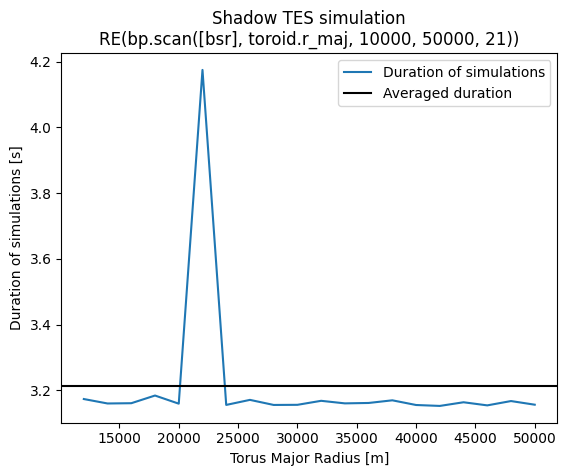

In [7]:
data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()